In [1]:
%load_ext advent_of_code

In [2]:
import collections
import functools
import heapq
import itertools
import pathlib
import re

from matplotlib import pyplot as plt
import more_itertools
import numpy as np
from tqdm.auto import tqdm

In [3]:
def dijkstra(graph, start):
    nodes = set(raw_graph.keys()) | set.union(*(set(edges.keys()) for edges in raw_graph.values()))

    dists = {}
    dists[start] = 0

    queue = [(0, start)]

    while queue:
        current_dist, current_node = heapq.heappop(queue)

        for other_node, other_dist in graph[current_node].items():
            dist = current_dist + other_dist
            if other_node not in dists or dist < dists[other_node]:
                dists[other_node] = dist
                heapq.heappush(queue, (dist, other_node))
                
    del dists[start]
    return dists

In [4]:
def subsets(iterable):
    "subsets([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

# Day 1

In [5]:
%%aoc 1 1

answer = max(map(
    lambda x: sum(map(int, x.split("\n"))),
    inputs.split("\n\n")
))

Execution time: 0.00084 seconds
Correct!


In [6]:
%%aoc 1 2

answer = sum(
    sorted(map(
        lambda x: sum(map(int, x.split("\n"))),
        inputs.split("\n\n")
    ))[-3:]
)

Execution time: 0.00091 seconds
Correct!


# Day 2

In [7]:
%%aoc 2 1

def score_naive(row):
    other = ord(row[0]) - ord("A")
    me = ord(row[2]) - ord("X")

    score = me + 1
    score += (me - other + 1) % 3 * 3
    return score

answer = sum(map(score_naive, inputs.split("\n")))

Execution time: 0.002 seconds
Correct!


In [8]:
%%aoc 2 2

def score_smart(row):
    other = ord(row[0]) - ord("A")
    me = (other + (ord(row[2]) - ord("X")) - 1) % 3

    score = me + 1
    score += (me - other + 1) % 3 * 3
    return score

answer = sum(map(score_smart, inputs.split("\n")))

Execution time: 0.002 seconds
Correct!


# Day 3

In [9]:
%%aoc 3 1

def get_priority(rucksack):
    half = len(rucksack)//2
    left = set(rucksack[:half])
    right = set(rucksack[half:])
    common = (left & right).pop()

    return ord(common.lower()) - ord("a") + 1 + (26 if common.isupper() else 0)

answer = sum(map(get_priority, inputs.split("\n")))

Execution time: 0.0017 seconds
Correct!


In [10]:
%%aoc 3 2

def get_badge_priority(rucksacks):
    common = set.intersection(*map(set, rucksacks)).pop()
    
    return ord(common.lower()) - ord("a") + 1 + (26 if common.isupper() else 0)

answer = sum(map(get_badge_priority, zip(*[iter(inputs.split("\n"))] * 3)))

Execution time: 0.0014 seconds
Correct!


# Day 4

In [11]:
%%aoc 4 1

pairs = [tuple(map(int, line.replace("-", ",").split(","))) for line in inputs.split("\n")]

answer = sum((r[0] <= r[2] and r[1] >= r[3]) or (r[0] >= r[2] and r[1] <= r[3]) for r in pairs)

Execution time: 0.0021 seconds
Correct!


In [12]:
%%aoc 4 2

pairs = [tuple(map(int, line.replace("-", ",").split(","))) for line in inputs.split("\n")]

answer = sum(min(r[1], r[3]) >= max(r[0], r[2]) for r in pairs)

Execution time: 0.0023 seconds
Correct!


# Day 5

In [13]:
#TODO: add to utils
def transpose_string(string):
    return "\n".join("".join(line) for line in zip(*string.split("\n")))

In [14]:
def preprocess_input(inputs):
    stacks, instructions = inputs.split("\n\n")

    instructions = [[int(x) for x in line.split() if x.isdigit()] for line in instructions.split("\n")]

    stacks = transpose_string(stacks).split("\n")[1::4]
    stacks = [list(stack[-2::-1].strip()) for stack in stacks]
    
    return stacks, instructions

In [15]:
%%aoc 5 1

stacks, instructions = preprocess_input(inputs)

for count, from_, to in instructions:
    for _ in range(count):
        stacks[to - 1].append(stacks[from_ - 1].pop())

answer = "".join(stack[-1] for stack in stacks)

Execution time: 0.0028 seconds
Correct!


In [16]:
%%aoc 5 2

stacks, instructions = preprocess_input(inputs)

for count, from_, to in instructions:
    stacks[to - 1].extend(stacks[from_ - 1][-count:])
    stacks[from_ - 1] = stacks[from_ - 1][:-count]

answer = "".join(stack[-1] for stack in stacks)

Execution time: 0.0023 seconds
Correct!


# Day 6

In [17]:
%%aoc 6 1

answer = next(
    i + len(marker)
    for i, marker in enumerate(more_itertools.sliding_window(inputs, 4))
    if len(set(marker)) == len(marker)
)

Execution time: 0.0016 seconds
Correct!


In [18]:
%%aoc 6 2

answer = next(
    i + len(marker)
    for i, marker in enumerate(more_itertools.sliding_window(inputs, 14))
    if len(set(marker)) == len(marker)
)

Execution time: 0.004 seconds
Correct!


# Day 7

In [19]:
%%aoc 7 1

path = pathlib.Path("/")
sizes = collections.defaultdict(int)
children = []

for block in inputs.split("\n$ "):
    if block.startswith("cd"):
        new_path = block[3:]
        if new_path == "/":
            path = Path("/")
        elif new_path == "..":
            path = path.parent
        else:
            path /= new_path
    elif block.startswith("ls"):
        for item in block.split("\n")[1:]:
            size, name = item.split(" ", 1)
            if size == "dir":
                children.append((path, path/name))
            else:
                sizes[path] += int(size)

for parent, child in children[::-1]:
    sizes[parent] += sizes[child]

answer = sum(size for size in sizes.values() if size < 100000)

Execution time: 0.0059 seconds
Correct!


In [20]:
%%aoc 7 2

path = pathlib.Path("/")
sizes = collections.defaultdict(int)
children = []

for block in inputs.split("\n$ "):
    if block.startswith("cd"):
        new_path = block[3:]
        if new_path == "/":
            path = Path("/")
        elif new_path == "..":
            path = path.parent
        else:
            path /= new_path
    elif block.startswith("ls"):
        for item in block.split("\n")[1:]:
            size, name = item.split(" ", 1)
            if size == "dir":
                children.append((path, path/name))
            else:
                sizes[path] += int(size)

for parent, child in children[::-1]:
    sizes[parent] += sizes[child]
    
to_free = sizes[pathlib.Path("/")] - 40000000
answer = min(size for size in sizes.values() if size > to_free)

Execution time: 0.0062 seconds
Correct!


# Day 8

In [21]:
%%aoc 8 1

trees = np.array([[int(tree) for tree in row] for row in inputs.split()])
mask = np.zeros_like(trees)

for _ in range(4):
    mask |= np.concatenate([
        [[True] * len(trees)],
        np.maximum.accumulate(trees, 0)[:-1] < trees[1:]
    ])

    trees = np.rot90(trees)
    mask = np.rot90(mask)
    
answer = mask.sum()

Execution time: 0.0052 seconds
Correct!


In [22]:
%%aoc 8 2

trees = np.array([[int(tree) for tree in row] for row in inputs.split()])

best = 0
for x in range(1, len(trees) - 1):
    for y in range(1, len(trees) - 1):
        total = 1
        mul = 0
        for cx in range(0, x)[::-1]:
            mul += 1
            if trees[cx, y] >= trees[x, y]:
                break
        total *= mul
        mul = 0
        for cx in range(x + 1, len(trees)):
            mul += 1
            if trees[cx, y] >= trees[x, y]:
                break
        total *= mul
        mul = 0
        for cy in range(0, y)[::-1]:
            mul += 1
            if trees[x, cy] >= trees[x, y]:
                break
        total *= mul
        mul = 0
        for cy in range(y + 1, len(trees)):
            mul += 1
            if trees[x, cy] >= trees[x, y]:
                break
        total *= mul
        
        best = max(best, total)
    
answer = best

Execution time: 0.074 seconds
Correct!


# Day 9

In [23]:
def fix_tail(head, tail):
    if abs(head - tail).max() <= 1:
        return tail
    else:
        return tail + np.sign(head - tail)

In [24]:
%%aoc 9 1

moves = [(line[0], int(line[2:])) for line in inputs.split("\n")]

head = np.array((0, 0))
tail = np.array((0, 0))

visited = set()

for move, num in moves:
    if move == "R":
        shift = (0, 1)
    elif move == "L":
        shift = (0, -1)
    elif move == "U":
        shift = (-1, 0)
    elif move == "D":
        shift = (1, 0)
        
    for _ in range(num):
        head += shift
        sign = np.sign(head - tail)
        tail += 0 if abs(head - tail).max() <= 1 else sign

        
        visited.add(tuple(tail))
        
answer = len(visited)

Execution time: 0.12 seconds
Correct!


In [25]:
%%aoc 9 2

moves = [(line[0], int(line[2:])) for line in inputs.split("\n")]

rope = np.zeros((10, 2))

visited = set()

for move, num in moves:
    if move == "R":
        shift = (0, 1)
    elif move == "L":
        shift = (0, -1)
    elif move == "U":
        shift = (-1, 0)
    elif move == "D":
        shift = (1, 0)
        
    for _ in range(num):
        rope[0] += shift
        for i in range(9):
            sign = np.sign(rope[i] - rope[i+1])
            rope[i+1] += 0 if abs(rope[i] - rope[i+1]).max() <= 1 else sign

        visited.add(tuple(rope[-1]))
        
answer = len(visited)

Execution time: 0.84 seconds
Correct!


# Day 10

In [26]:
%%aoc 10 1

ops = [int(line) if line.isdigit() or line[1:].isdigit() else 0 for line in inputs.split()]

signal = 0
register = 1
for cycle, op in enumerate(ops, 1):
    if cycle % 40 == 20:
        signal += register * cycle

    register += op        

answer = signal

Execution time: 0.001 seconds
Correct!


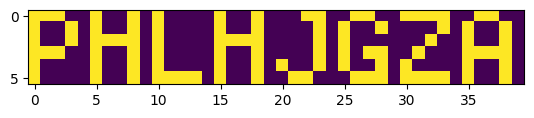

Execution time: 0.12 seconds


In [27]:
%%aoc 10 2 nosubmit

ops = [int(line) if line.isdigit() or line[1:].isdigit() else 0 for line in inputs.split()]

grid = np.zeros((6, 40))

register = 1
for cycle, op in enumerate(ops):        
    div, mod = divmod(cycle, 40)

    if register - 1 <= mod <= register + 1:
        grid[div, mod] = 1

    register += op        

plt.imshow(grid)

# Day 11

In [28]:
inputs = """Monkey 0:
  Starting items: 79, 98
  Operation: new = old * 19
  Test: divisible by 23
    If true: throw to monkey 2
    If false: throw to monkey 3

Monkey 1:
  Starting items: 54, 65, 75, 74
  Operation: new = old + 6
  Test: divisible by 19
    If true: throw to monkey 2
    If false: throw to monkey 0

Monkey 2:
  Starting items: 79, 60, 97
  Operation: new = old * old
  Test: divisible by 13
    If true: throw to monkey 1
    If false: throw to monkey 3

Monkey 3:
  Starting items: 74
  Operation: new = old + 3
  Test: divisible by 17
    If true: throw to monkey 0
    If false: throw to monkey 1"""

In [29]:
%%aoc 11 1

def add(old, a, b):
    return (a or old) + (b or old)

def mul(old, a, b):
    return (a or old) * (b or old)

Monkey = collections.namedtuple("Monkey", ["items", "op", "test", "dir_true", "dir_false"])

monkeys = []

for monkey in inputs.split("\n\n"):
    _, items, op, test, dir_true, dir_false = monkey.split("\n")
    items = list(map(int, items.split(": ")[1].split(", ")))
    
    assert op.startswith("  Operation: new = ")
    op = op.split(" = ")[1]
    
    a, op, b = op.split()
    if a == "old":
        a = None
    else:
        a = int(a)
    if b == "old":
        b = None
    else:
        b = int(b)
    
    if op == "+":
        op = functools.partial(add, a=a, b=b)
    elif op == "*":
        op = functools.partial(mul, a=a, b=b)
    else:
        raise NotImplementedError
    
    assert test.startswith("  Test: divisible by ")
    test = int(test.split(" by ")[1])
    
    assert dir_true.startswith("    If true: throw to monkey ")
    dir_true = int(dir_true.split()[-1])
    
    assert dir_false.startswith("    If false: throw to monkey ")
    dir_false = int(dir_false.split()[-1])

    monkeys.append(Monkey(collections.deque(items), op, test, dir_true, dir_false))

counts = [0] * len(monkeys)

for _ in range(20):
    for i, monkey in enumerate(monkeys):
        while monkey.items:
            counts[i] += 1
            item = monkey.op(monkey.items.popleft()) // 3
            if item % monkey.test == 0:
                monkeys[monkey.dir_true].items.append(item)
            else:
                monkeys[monkey.dir_false].items.append(item)

counts = sorted(counts)
answer = counts[-1] * counts[-2]

Execution time: 0.0054 seconds
Correct!


In [30]:
%%aoc 11 2

def add(old, a, b):
    return (a or old) + (b or old)

def mul(old, a, b):
    return (a or old) * (b or old)

Monkey = collections.namedtuple("Monkey", ["items", "op", "test", "dir_true", "dir_false"])

monkeys = []

for monkey in inputs.split("\n\n"):
    _, items, op, test, dir_true, dir_false = monkey.split("\n")
    items = list(map(int, items.split(": ")[1].split(", ")))
    
    assert op.startswith("  Operation: new = ")
    op = op.split(" = ")[1]
    
    a, op, b = op.split()
    if a == "old":
        a = None
    else:
        a = int(a)
    if b == "old":
        b = None
    else:
        b = int(b)
    
    if op == "+":
        op = functools.partial(add, a=a, b=b)
    elif op == "*":
        op = functools.partial(mul, a=a, b=b)
    else:
        raise NotImplementedError
    
    assert test.startswith("  Test: divisible by ")
    test = int(test.split(" by ")[1])
    
    assert dir_true.startswith("    If true: throw to monkey ")
    dir_true = int(dir_true.split()[-1])
    
    assert dir_false.startswith("    If false: throw to monkey ")
    dir_false = int(dir_false.split()[-1])

    monkeys.append(Monkey(collections.deque(items), op, test, dir_true, dir_false))

mod = np.prod([monkey.test for monkey in monkeys])

counts = [0] * len(monkeys)

for _ in range(10000):
    for i, monkey in enumerate(monkeys):
        while monkey.items:
            counts[i] += 1
            item = monkey.op(monkey.items.popleft()) % mod
            if item % monkey.test == 0:
                monkeys[monkey.dir_true].items.append(item)
            else:
                monkeys[monkey.dir_false].items.append(item)

counts = sorted(counts)
answer = counts[-1] * counts[-2]

Execution time: 0.65 seconds
Correct!


# Day 12

In [31]:
%%aoc 12 1

grid = np.array([list(x) for x in inputs.split()])
grid = np.pad(grid, 1, constant_values="~")
steps = -np.ones_like(grid, dtype=int)

start_x, start_y = np.nonzero(grid == "S")
end_x, end_y = np.nonzero(grid == "E")

grid[start_x, start_y] = "a"
grid[end_x, end_y] = "z"

queue = [(np.concatenate([start_x, start_y]), 0)]

for pos, new_steps in queue:
    if steps[tuple(pos)] >= 0:
        continue
    steps[tuple(pos)] = new_steps
    for shift in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        next_pos = pos + shift
        if ord(grid[tuple(next_pos)]) <= ord(grid[tuple(pos)]) + 1:
            queue.append((next_pos, new_steps + 1))

answer = steps[end_x, end_y].item()

Execution time: 0.15 seconds
Correct!


In [32]:
%%aoc 12 2

grid = np.array([list(x) for x in inputs.split()])
grid = np.pad(grid, 1, constant_values="~")
steps = -np.ones_like(grid, dtype=int)

start_x, start_y = np.nonzero(grid == "E")

grid[np.nonzero(grid == "S")] = "a"
grid[start_x, start_y] = "z"

queue = [(np.concatenate([start_x, start_y]), 0)]

best_steps = None

for pos, new_steps in queue:
    if steps[tuple(pos)] >= 0:
        continue
    steps[tuple(pos)] = new_steps
    for shift in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        next_pos = pos + shift
        if ord(grid[tuple(next_pos)]) >= ord(grid[tuple(pos)]) - 1 and grid[tuple(next_pos)] != "~":
            queue.append((next_pos, new_steps + 1))
            
            if grid[tuple(next_pos)] == "a" and best_steps == None:
                best_steps = new_steps + 1

answer = best_steps

Execution time: 0.16 seconds
Correct!


# Day 13

In [33]:
def comparator(left, right):
    if isinstance(left, list) and isinstance(right, list):
        for a, b in zip(left, right):
            comparison = comparator(a, b)
            if comparison != 0:
                return comparison
            
        return len(left) - len(right)
    
    elif not isinstance(left, list) and not isinstance(right, list):        
        return left - right
    
    elif not isinstance(left, list):
        return comparator([left], right)
    
    elif not isinstance(right, list):
        return comparator(left, [right])

In [34]:
%%aoc 13 1
        
count = 0
for i, pair in enumerate(inputs.split("\n\n")):
    left, right = map(eval, pair.split("\n"))
    if comparator(left, right) < 0:
        count += i + 1
        
answer = count

Execution time: 0.015 seconds
Correct!


In [35]:
%%aoc 13 2

packets = sorted(
    list(map(
        eval,
        inputs.replace("\n\n", "\n").split("\n")
    )) + [[[2]], [[6]]],
    key=functools.cmp_to_key(comparator)
)

answer = (packets.index([[2]]) + 1) * (packets.index([[6]]) + 1)

Execution time: 0.02 seconds
Correct!


# Day 14

In [36]:
%%aoc 14 1

taken = set()

grid_y_max = -np.infty

for line in inputs.split("\n"):
    for start, stop in more_itertools.pairwise(line.split(" -> ")):
        start_x, start_y = map(int, start.split(","))
        stop_x, stop_y = map(int, stop.split(","))
        
        grid_y_max = max(grid_y_max, start_y, stop_y)
        
        start_y, stop_y = sorted((start_y, stop_y))
        start_x, stop_x = sorted((start_x, stop_x))
        if start_x == stop_x:
            for i in range(start_y, stop_y + 1):
                taken.add((start_x, i))

        elif start_y == stop_y:
            for i in range(start_x, stop_x + 1):
                taken.add((i, start_y))

grid = np.zeros((1000, 300, 600))
taken_walls = taken.copy()

for sand in itertools.count():
    point = np.array((500, 0))
    stopped = False
    while point[1] < grid_y_max:
        for shift in [(0, 1), (-1, 1), (1, 1)]:
            if tuple(point + shift) not in taken:
                point += shift
                break
        else:
            taken.add(tuple(point))
            break

    if point[1] == grid_y_max:
        break
        
answer = sand

Execution time: 0.47 seconds
Correct!


In [37]:
%%aoc 14 2

taken = set()

grid_y_max = -np.infty

for line in inputs.split("\n"):
    for start, stop in more_itertools.pairwise(line.split(" -> ")):
        start_x, start_y = map(int, start.split(","))
        stop_x, stop_y = map(int, stop.split(","))
        
        grid_y_max = max(grid_y_max, start_y, stop_y)
        
        start_y, stop_y = sorted((start_y, stop_y))
        start_x, stop_x = sorted((start_x, stop_x))
        if start_x == stop_x:
            for i in range(start_y, stop_y + 1):
                taken.add((start_x, i))
        elif start_y == stop_y:
            for i in range(start_x, stop_x + 1):
                taken.add((i, start_y))

for sand in itertools.count():
    point = np.array((500, 0))
    stopped = False
    while point[1] < grid_y_max + 1:
        for shift in [(0, 1), (-1, 1), (1, 1)]:
            if tuple(point + shift) not in taken:
                point += shift
                break
        else:
            break
    taken.add(tuple(point))

    if (point == (500, 0)).all():
        break

answer = sand + 1

Execution time: 24 seconds
Correct!


# Day 15

In [38]:
class MutableRange:
    def __init__(self, start, stop):
        self.start = start
        self.stop = stop
        
    def __and__(self, other):
        return MutableRange(max(self.start, other.start), min(self.stop, other.stop))

    def __len__(self):
        return max(0, self.stop - self.start)
    
    def __bool__(self):
        return self.stop > self.start
    
    def __le__(self, other):
        return (
            self.start >= other.start and
            self.stop <= other.stop
        )

    def __ge__(self, other):
        return (
            self.start <= other.start and
            self.stop >= other.stop
        )
    
    def __contains__(self, point):
        return self.start <= point < self.stop
    
    def __repr__(self):
        return f"MutableRange({self.start}, {self.stop})"
    

class RangeUnion:
    def __init__(self, ranges=()):
        self.ranges = [MutableRange(r.start, r.stop) for r in ranges]

    def remove(self, remove_range):
        if len(remove_range) <= 0:
            return
        
        self.ranges = [
            own_range for own_range in self.ranges
            if not (own_range <= remove_range)
        ]
        
        x = 0
        for own_range in self.ranges:
            if own_range.stop in remove_range:
                x += 1
                own_range.stop = remove_range.start
            elif own_range.start in remove_range:
                x += 1
                own_range.start = remove_range.stop
            elif own_range >= remove_range:
                self.ranges.append(MutableRange(remove_range.stop, own_range.stop))
                own_range.stop = remove_range.start
                break
            if x == 2:
                break
        
        self.ranges = [
            own_range for own_range in self.ranges
            if own_range
        ]
        
        return self
        
    def add(self, add_range):
        if len(add_range) <= 0:
            return

        intersecting_ranges = [
            own_range for own_range in self.ranges
            if own_range & add_range
        ] + [add_range]
        
        combined_range = MutableRange(
            min(r.start for r in intersecting_ranges),
            max(r.stop for r in intersecting_ranges),
        )
        
        self.ranges = [
            own_range for own_range in self.ranges
            if not (own_range & add_range)
        ] + [combined_range]
        
        return self

                
    def __bool__(self):
        return bool(self.ranges)

    def __repr__(self):
        return "RangeUnion(" + repr(self.ranges) + ")"

In [39]:
%%aoc 15 1

pairs = [tuple(map(int, re.findall("(-?\d+)", line))) for line in inputs.split("\n")]
circles = [(x, y, abs(x-bx) + abs(y-by)) for x, y, bx, by in pairs]

col = 2000000

included = RangeUnion()
for x, y, r in circles:
    included.add(range(x - r + abs(col - y), x + r - abs(col - y) + 1))

excluded = set()
for _, _, bx, by in pairs:
    if by == col:
        excluded.add(bx)
        
answer = sum(map(len, included.ranges)) - len(excluded)

Execution time: 0.002 seconds
Correct!


In [40]:
%%aoc 15 2

pairs = [tuple(map(int, re.findall("(-?\d+)", line))) for line in inputs.split("\n")]
circles = [(x, y, abs(x-bx) + abs(y-by)) for x, y, bx, by in pairs]

for col in tqdm(range(0, 4000000 + 1)):
    points = RangeUnion([range(0, 4000000 + 1)])
    for x, y, r in circles:
        points.remove(range(
            x - r + abs(col - y),
            x + r - abs(col - y) + 1
        ))
        
        if not points:
            break
    else:
        score = 4000000 * points.ranges[0].start + col
        break
        
answer = score

  0%|          | 0/4000001 [00:00<?, ?it/s]

Execution time: 92 seconds
Correct!


# Day 16

In [41]:
@functools.cache
def max_flow(start, time_remaining, available):
    best = 0
    for other in available:
        reduced_time = time_remaining - graph[start][other] - 1
        if reduced_time > 0:
            best = max(
                best,
                max_flow(other, reduced_time, available - {other}) + reduced_time * rates[other],
            )
    return best

In [42]:
%%aoc 16 1

expression = re.compile(r"Valve (\w+) has flow rate=(-?\d+); tunnels? leads? to valves? (.+)")
parsed = [expression.findall(line)[0] for line in inputs.split("\n")]

rates = {valve: int(rate) for valve, rate, _ in parsed}
active_nodes = {valve for valve, rate in rates.items() if rate > 0}

raw_graph = {valve: {other: 1 for other in near.split(", ")} for valve, _, near in parsed}


graph = {
    node: {
        node: dist for node, dist in dijkstra(raw_graph, node).items() if node in active_nodes
    }
    for node in active_nodes | {"AA"}
}
    
answer = max_flow("AA", 30, frozenset(active_nodes))

Execution time: 0.26 seconds
Correct!


In [43]:
%%aoc 16 2

expression = re.compile(r"Valve (\w+) has flow rate=(-?\d+); tunnels? leads? to valves? (.+)")
parsed = [expression.findall(line)[0] for line in inputs.split("\n")]

rates = {valve: int(rate) for valve, rate, _ in parsed}
active_nodes = {valve for valve, rate in rates.items() if rate > 0}

raw_graph = {valve: {other: 1 for other in near.split(", ")} for valve, _, near in parsed}

graph = {
    node: {
        node: dist for node, dist in dijkstra(raw_graph, node).items() if node in active_nodes
    }
    for node in active_nodes | {"AA"}
}


best = 0
for allowed_nodes in subsets(active_nodes):
    me = max_flow("AA", 26, frozenset(allowed_nodes))
    elephant = max_flow("AA", 26, frozenset(active_nodes) - set(allowed_nodes))

    best = max(best, me + elephant)

answer = best

Execution time: 28 seconds
Correct!


# Day 17

In [44]:
%%aoc 17 1

winds = itertools.cycle(inputs)

types = [
    {(0, 0), (0, 1), (0, 2), (0, 3)},
    {(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)},
    {(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)},
    {(0, 0), (1, 0), (2, 0), (3, 0)},
    {(0, 0), (0, 1), (1, 0), (1, 1)}
]

def make_points(type_):
    return {tuple(point) for point in np.stack(np.where(type_)).T}

def shift(points, dx=0, dy=0):
    return {(point[0] + dx, point[1] + dy) for point in points}

stack = set()

max_height = 0

for figure_num in range(2022):
    figure = shift(types[figure_num % 5], dx=max_height + 3, dy=2)
    
    for wind in winds:
        new_figure = shift(figure, dy=-1 if wind == "<" else 1)
        if not stack & new_figure and all(0 <= point[1] < 7 for point in new_figure):
            figure = new_figure

        new_figure = shift(figure, dx=-1)
        if not stack & new_figure and min(point[0] for point in new_figure) >= 0:
            figure = new_figure
        else:
            break

    max_height = max(max_height, max(point[0] for point in figure) + 1)
    stack |= figure

answer = max_height

Execution time: 0.064 seconds
Correct!


In [45]:
%%aoc 17 2

winds = itertools.cycle(inputs)

types = [
    {(0, 0), (0, 1), (0, 2), (0, 3)},
    {(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)},
    {(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)},
    {(0, 0), (1, 0), (2, 0), (3, 0)},
    {(0, 0), (0, 1), (1, 0), (1, 1)}
]

def make_points(type_):
    return {tuple(point) for point in np.stack(np.where(type_)).T}

def shift(points, dx=0, dy=0):
    return {(point[0] + dx, point[1] + dy) for point in points}

stack = set()

max_height = 0

fingerprints = []
loop_detect_size = 100
total = 1000000000000

for figure_num in range(10000):
    figure = shift(types[figure_num % 5], dx=max_height + 3, dy=2)
    
    for wind in winds:
        new_figure = shift(figure, dy=-1 if wind == "<" else 1)
        if not stack & new_figure and all(0 <= point[1] < 7 for point in new_figure):
            figure = new_figure

        new_figure = shift(figure, dx=-1)
        if not stack & new_figure and min(point[0] for point in new_figure) >= 0:
            figure = new_figure
        else:
            break

    prev_height = max_height
    max_height = max(max_height, max(point[0] for point in figure) + 1)
    
    pos = min(point[1] for point in figure)
    
    fingerprints.append(max_height - prev_height)
    stack |= figure

for loop_size in range(len(fingerprints)):
    if fingerprints[-loop_size:] == fingerprints[-2*loop_size:-loop_size]:
        break

increment = sum(fingerprints[-loop_size:])
steps_skipped = (total - figure_num) // loop_size

figure_num += steps_skipped * loop_size
max_height += steps_skipped * increment

for d in fingerprints[-loop_size: -loop_size + total - figure_num - 1]:
    max_height += d

answer = max_height

Execution time: 0.28 seconds
Correct!


In [46]:
def show(stack, figure):
    plt.figure()
    grid = np.zeros((max(point[0] for point in figure | stack) + 3, 7))
    for x, y in stack:
        grid[-x-1, y] = 1
    for x, y in figure:
        grid[-x-1, y] = 2

    plt.imshow(grid[:100])

# Day 18

In [47]:
%%aoc 18 1

cubes = [np.array(list(map(int, cube.split(",")))) for cube in inputs.split()]

def get_side_centers(cube):
    shifts = [np.array([0] * i + [1] + [0] * (2-i)) for i in range(3)]
    return [tuple(cube + shift * 0.5) for shift in shifts] + [tuple(cube - shift * 0.5) for shift in shifts]

sides = collections.Counter()
for cube in cubes:
    for side in get_side_centers(cube):
        sides[side] += 1

answer = sum(c for c in sides.values() if c == 1)

Execution time: 0.083 seconds
Correct!


In [48]:
%%aoc 18 2

cubes = {tuple(map(int, cube.split(","))) for cube in inputs.split()}

def get_side_centers(cube):
    shifts = [np.array([0] * i + [1] + [0] * (2-i)) for i in range(3)]
    return [tuple(cube + shift * 0.5) for shift in shifts] + [tuple(cube - shift * 0.5) for shift in shifts]

bb_min = np.stack(list(cubes)).min() - 1
bb_max = np.stack(list(cubes)).max() + 1

start = tuple([bb_min] * 3)
queue = [start]
visited = cubes.copy()

sides = collections.Counter()
for cube in queue:
    if cube in visited:
        continue
    visited.add(cube)
    sides.update(get_side_centers(cube))
    
    for axis in range(3):
        for shift in (-1, 1):
            step = [0] * axis + [shift] + [0] * (2 - axis)
            other = tuple(np.array(cube) + step)
            if (bb_min <= other).all() and (other <= bb_max).all():
                queue.append(other)
                
answer = sum(c for side, c in sides.items() if c == 1 and (bb_min - 0.5) not in side and (bb_max + 0.5) not in side)

Execution time: 1.2 seconds
Correct!


# Day 19

In [49]:
%%aoc 19 1

pattern = re.compile(r"Blueprint (\d+).*(\d+) ore.*(\d+) ore.*(\d+) ore and (\d+) clay.*(\d+) ore and (\d+) obsidian.*")
blueprints = [tuple(map(int, pattern.match(blueprint).groups())) for blueprint in inputs.split("\n")]

score = 0
for num, ore_cost, clay_cost, obs_ore_cost, obs_clay_cost, geode_ore_cost, geode_obs_cost in tqdm(blueprints):
    ore_robot = np.array([ore_cost, 0, 0, 0])
    clay_robot = np.array([clay_cost, 0, 0, 0])
    obs_robot = np.array([obs_ore_cost, obs_clay_cost, 0, 0])
    geode_robot = np.array([geode_ore_cost, 0, geode_obs_cost, 0])
    robot_costs = [ore_robot, clay_robot, obs_robot, geode_robot]
        
    max_geodes = 0
    start_res = np.array([0, 0, 0, 0])
    start_robots = np.array([1, 0, 0, 0])
    queue = [(24, start_res, start_robots)]
    for time, res, robots in (queue):
        if (time * (time+1))//2 + res[3] < max_geodes:
            continue
        for i, robot in enumerate(robot_costs):
            new_res = res - robot
            if (new_res >= 0).all() and (new_res[robot != 0] < robots[robot != 0]).any() and time >= 1:
                queue.append((time - 1, new_res + robots, robots + np.eye(1, 4, k=i, dtype=int)[0]))
                
        if time >= 1:
            queue.append((time - 1, res + robots, robots))
        max_geodes = max(max_geodes, res[3])
        
    score += num * max_geodes
    
answer = score

  0%|          | 0/30 [00:00<?, ?it/s]

Execution time: 1.1e+02 seconds
Correct!


In [50]:
%%aoc 19 2

pattern = re.compile(r"Blueprint (\d+).*(\d+) ore.*(\d+) ore.*(\d+) ore and (\d+) clay.*(\d+) ore and (\d+) obsidian.*")
blueprints = [tuple(map(int, pattern.match(blueprint).groups())) for blueprint in inputs.split("\n")]

score = 1
for num, ore_cost, clay_cost, obs_ore_cost, obs_clay_cost, geode_ore_cost, geode_obs_cost in tqdm(blueprints[:3]):
    ore_robot = np.array([ore_cost, 0, 0, 0])
    clay_robot = np.array([clay_cost, 0, 0, 0])
    obs_robot = np.array([obs_ore_cost, obs_clay_cost, 0, 0])
    geode_robot = np.array([geode_ore_cost, 0, geode_obs_cost, 0])
    robot_costs = [ore_robot, clay_robot, obs_robot, geode_robot]
        
    max_geodes = 0
    start_res = np.array([0, 0, 0, 0])
    start_robots = np.array([1, 0, 0, 0])
    queue = [(32, start_res, start_robots)]
    for time, res, robots in (queue):
        if (time * (time+1))//2 + res[3] < max_geodes:
            continue
        for i, robot in enumerate(robot_costs):
            new_res = res - robot
            if (new_res >= 0).all() and (new_res[robot != 0] < robots[robot != 0]).any() and time >= 1:
                new_robots = robots.copy()
                new_robots[i] += 1
                queue.append((time - 1, new_res + robots, new_robots))
                
        if time >= 1:
            queue.append((time - 1, res + robots, robots))
        max_geodes = max(max_geodes, res[3])
        
    score *= max_geodes
    
answer = score

  0%|          | 0/3 [00:00<?, ?it/s]

Execution time: 5.5e+02 seconds
Correct!


# Day 20

In [51]:
%%aoc 20 1

mixed = list(map(int, inputs.split()))

order = list(range(len(mixed)))

for i in range(len(order)):
    old_pos = order.index(i)

    n = mixed.pop(old_pos)

    new_pos = (old_pos + n) % len(mixed)

    mixed.insert(new_pos, n)
    order.insert(new_pos, order.pop(old_pos))

zero = mixed.index(0)
answer = sum(mixed[(zero + shift) % len(mixed)] for shift in (1000, 2000, 3000))

Execution time: 0.12 seconds
Correct!


In [52]:
%%aoc 20 2

key = 811589153

mixed = list(map(int, inputs.split()))
mixed = [n * key for n in mixed]

order = list(range(len(mixed)))

for r in range(10):
    for i in range(len(order)):
        old_pos = order.index(i)

        n = mixed.pop(old_pos)

        new_pos = (old_pos + n) % len(mixed)

        mixed.insert(new_pos, n)
        order.insert(new_pos, order.pop(old_pos))

zero = mixed.index(0)
answer = sum(mixed[(zero + shift) % len(mixed)] for shift in (1000, 2000, 3000))

Execution time: 1.5 seconds
Correct!


# Day 21

In [53]:
import sympy

In [54]:
%%aoc 21 1

def get_monkey(name):
    if isinstance(monkeys[name], sympy.Symbol):
        return monkeys[name]
    elif monkeys[name].isdigit():
        return int(monkeys[name])
    else:
        left, op, right = monkeys[name].split()
        
        return eval(f"get_monkey(left) {op} get_monkey(right)")

monkeys = dict(line.split(": ") for line in inputs.split("\n"))
answer = int(get_monkey("root"))

Execution time: 0.017 seconds
Correct!


In [55]:
%%aoc 21 2

def get_monkey(name):
    if isinstance(monkeys[name], sympy.Symbol):
        return monkeys[name]
    elif monkeys[name].isdigit():
        return int(monkeys[name])
    else:
        left, op, right = monkeys[name].split()
        
        return eval(f"get_monkey(left) {op} get_monkey(right)")

monkeys = dict(line.split(": ") for line in inputs.split("\n"))
monkeys["humn"] = sympy.Symbol("humn")

left, _, right = monkeys["root"].split()

answer = int(round(sympy.solve(get_monkey(left) - get_monkey(right), monkeys["humn"])[0]))

Execution time: 0.082 seconds
Correct!


# Day 22

In [56]:
import scipy.signal

In [57]:
%%aoc 22 1

grid, directions = inputs.split("\n\n")

grid = grid.split("\n")
width = max(map(len, grid))
grid = np.array([list(row.ljust(width)) for row in grid])
directions = re.findall(r"[0-9]+|L|R", directions)

vis_grid = grid.copy()

def next_point(pos, orientation, grid):
    next_pos = (pos + orientation) % grid.shape
    while grid[tuple(next_pos)] == " ":
        next_pos = (next_pos + orientation) % grid.shape
    if grid[tuple(next_pos)] == "#":
        return pos
    else:
        return next_pos
    

pos = np.array([0, np.where(grid[0] == ".")[0][0]])
orientation = np.array([0, 1])

for d in directions:
    if d == "L":
        orientation = np.array([[0, -1], [1, 0]]) @ orientation
    elif d == "R":
        orientation = np.array([[0, 1], [-1, 0]]) @ orientation
    else:
        for _ in range(int(d)):
            if (orientation == [0, 1]).all():
                facing = ">"
            if (orientation == [1, 0]).all():
                facing = "v"
            if (orientation == [-1, 0]).all():
                facing = "^"
            if (orientation == [0, -1]).all():
                facing = "<"
            vis_grid[tuple(pos)] = facing

            pos = next_point(pos, orientation, grid)

x, y = pos + 1

if (orientation == [0, 1]).all():
    facing = 0
if (orientation == [1, 0]).all():
    facing = 1
if (orientation == [0, -1]).all():
    facing = 2
if (orientation == [-1, 0]).all():
    facing = 3

answer = 1000 * x + 4 * y + facing

Execution time: 1.3 seconds
Correct!


In [58]:
def next_point(pos, orientation, grid, warps):
    next_pos = pos + orientation
    next_orientation = orientation
    if (next_pos < 0).any() or (next_pos >= grid.shape).any() or grid[tuple(next_pos)] == " ":
        next_pos, next_orientation = warps[tuple(pos), tuple(orientation)]
    if grid[tuple(next_pos)] == "#":
        return pos, orientation
    else:
        return next_pos, next_orientation

In [59]:
%%aoc 22 2

grid, directions = inputs.split("\n\n")

grid = grid.split("\n")
width = max(map(len, grid))
grid = np.array([list(row.ljust(width)) for row in grid])
directions = re.findall(r"[0-9]+|L|R", directions)

vis_grid = grid.copy()

bin_grid = grid != " "
conv = scipy.signal.convolve(bin_grid, np.ones((3, 3), dtype=int), mode="same")
outer_corners = conv == 4
inner_corners = conv == 8
inside = conv == 9
edges = bin_grid ^ inside

center_corners = collections.defaultdict(list)
warps = {}
corner_dists = [100, 200, 50]


for i, (corner, max_dist) in enumerate(zip(np.argwhere(inner_corners), corner_dists)):
    allowed = outer_corners.astype(int) + edges
    queue = [(corner, i, 0, (0, 0))]

    for point, center_corner, dist, last_shift in queue:
        if dist > max_dist:
            break
        if not edges[tuple(point)] or not allowed[tuple(point)]:
            continue
        allowed[tuple(point)] -= 1

        if dist > 0:
            center_corners[(dist, center_corner)].append((point, last_shift))

        for shift in ((-1, 0), (1, 0), (0, -1), (0, 1)):
            shifted = point + shift
            if (
                (shifted >= 0).all() and
                (shifted < bin_grid.shape).all()
            ):
                if allowed[tuple(point)]:
                    if edges[tuple(shifted)] and allowed[tuple(shifted)]:
                        queue.append((point, center_corner, dist + 1, tuple(shift)))
                else:
                    queue.append((shifted, center_corner, dist + 1, tuple(shift)))

taken = set()
finished = set()
for (dist, center), ((left, left_shift), (right, right_shift)) in sorted(center_corners.items()):
    if center not in finished and (tuple(left), tuple(abs(np.array(left_shift)))) not in taken and (tuple(right), tuple(abs(np.array(right_shift)))) not in taken:
        taken.add((tuple(left), tuple(abs(np.array(left_shift)))))
        taken.add((tuple(right), tuple(abs(np.array(right_shift)))))
        left_shift = np.array([[0, -1], [1, 0]]) @ left_shift
        right_shift = np.array([[0, -1], [1, 0]]) @ right_shift
        warps[(tuple(left), tuple(left_shift))] = right, np.array(right_shift)
        warps[(tuple(right), tuple(right_shift))] = left, np.array(left_shift)
        left_shift = -left_shift
        right_shift = -right_shift
        warps[(tuple(left), tuple(left_shift))] = right, np.array(right_shift)
        warps[(tuple(right), tuple(right_shift))] = left, np.array(left_shift)

    elif center not in finished:
        finished.add(center)
pos = np.array([0, np.where(grid[0] == ".")[0][0]])
orientation = np.array([0, 1])

for d in directions:
    if d == "L":
        orientation = np.array([[0, -1], [1, 0]]) @ orientation
    elif d == "R":
        orientation = np.array([[0, 1], [-1, 0]]) @ orientation
    else:
        for _ in range(int(d)):
            if (orientation == [0, 1]).all():
                facing = ">"
            if (orientation == [1, 0]).all():
                facing = "v"
            if (orientation == [-1, 0]).all():
                facing = "^"
            if (orientation == [0, -1]).all():
                facing = "<"
            vis_grid[tuple(pos)] = facing

            pos, orientation = next_point(pos, orientation, grid, warps)

x, y = pos + 1

if (orientation == [0, 1]).all():
    facing = 0
if (orientation == [1, 0]).all():
    facing = 1
if (orientation == [0, -1]).all():
    facing = 2
if (orientation == [-1, 0]).all():
    facing = 3

answer = 1000 * x + 4 * y + facing

Execution time: 4 seconds
Correct!


# Day 23

In [60]:
import scipy.signal

In [61]:
%%aoc 23 1

elves = np.array([[c == "#" for c in line] for line in inputs.split()])

look = np.array([[1, 1, 1], [0, 0, 0], [0, 0, 0]])

looks = np.array([look[::-1], look, np.rot90(look, 3), np.rot90(look)])
moves = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

for round in range(10):
    if any(elves[0]) or any(elves[-1]) or any(elves[:, 0]) or any(elves[:, -1]):
        elves = np.pad(elves, 1)
    unhappy_elves = elves & (scipy.signal.convolve2d(elves, [[1, 1, 1], [1, 0, 1], [1, 1, 1]], mode="same") > 0)

    moving = collections.defaultdict(list)
    moved = np.zeros_like(elves)

    for look, move in zip(looks, moves):
        nearby = scipy.signal.convolve2d(elves, look, mode="same")
        ready = (nearby == 0) & unhappy_elves

        for point in np.argwhere(ready & ~moved):
            moving[tuple(point + move)].append(point)

        moved |= ready

    for to_, from_ in moving.items():
        if len(from_) == 1:
            elves[tuple(to_)] = 1
            elves[tuple(from_[0])] = 0

    moves = np.roll(moves, -1, axis=0)
    looks = np.roll(looks, -1, axis=0)

elf_points = np.argwhere(elves)
top_left = elf_points.min(axis=0)
bottom_right = elf_points.max(axis=0)
elves = elves[
    top_left[0]:bottom_right[0]+1,
    top_left[1]:bottom_right[1]+1
]

answer = (elves == 0).sum()

Execution time: 0.043 seconds
Correct!


In [62]:
%%aoc 23 2

elves = np.array([[c == "#" for c in line] for line in inputs.split()])

look = np.array([[1, 1, 1], [0, 0, 0], [0, 0, 0]])
looks = np.array([look[::-1], look, np.rot90(look, 3), np.rot90(look)])

moves = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

for round in itertools.count(1):
    if any(elves[0]):
        elves = np.pad(elves, ((1, 0), (0, 0)))
    if any(elves[-1]):
        elves = np.pad(elves, ((0, 1), (0, 0)))
    if any(elves[:, 0]):
        elves = np.pad(elves, ((0, 0), (1, 0)))
    if any(elves[:, -1]):
        elves = np.pad(elves, ((0, 0), (0, 1)))

    unhappy_elves = elves & (scipy.signal.convolve2d(elves, [[1, 1, 1], [1, 0, 1], [1, 1, 1]], mode="same") > 0)

    moving = collections.defaultdict(list)
    moved = np.zeros_like(elves)

    for look, move in zip(looks, moves):
        nearby = scipy.signal.convolve2d(elves, look, mode="same")
        ready = (nearby == 0) & unhappy_elves

        for point in np.argwhere(ready & ~moved):
            moving[tuple(point + move)].append(point)

        moved |= ready

    moved = False
    for to_, from_ in moving.items():
        if len(from_) == 1:
            moved = True
            elves[tuple(to_)] = 1
            elves[tuple(from_[0])] = 0
    if not moved:
        break

    moves = np.roll(moves, -1, axis=0)
    looks = np.roll(looks, -1, axis=0)

answer = round

Execution time: 4.3 seconds
Correct!


# Day 24

In [63]:
%%aoc 24 1

grid = inputs.split("\n")
arrows = [row[1: -1] for row in grid[1:-1]]

grid = np.zeros((len(arrows), len(arrows[0]), np.lcm(len(arrows), len(arrows[0]))), dtype=bool)

for arrow_kind, shift, axis in [("^", -1, 0), ("v", 1, 0), ("<", -1, 1), (">", 1, 1)]:
    selected = np.array([[arrow == arrow_kind for arrow in row] for row in arrows])

    for s in range(grid.shape[-1]):
        grid[..., s] |= selected
        selected = np.roll(np.array(selected), shift, axis)

grid = np.pad(grid, ((1, 1), (0, 0), (0, 0)))

grid[0] = True
grid[-1] = True
grid[0, 0] = False
grid[-1, -1] = False

visited = np.zeros_like(grid)
queue = [(np.array((0, 0)), 0)]

for node, time in queue:
    if (node == np.array(grid.shape[:2]) - 1).all():
        print(time)
        break
    else:
        if visited[tuple(node)][time % grid.shape[-1]]:
            continue
        shifts = [(1, 0), (-1, 0), (0, 1), (0, -1), (0, 0)]
        visited[tuple(node)][time % grid.shape[-1]] = True
        
    for shift in shifts:
        next_node = node + shift
        if (next_node >= 0).all() and (next_node < grid.shape[:-1]).all():
            if not grid[tuple(next_node)][(time + 1) % grid.shape[-1]]:
                queue.append((next_node, time + 1))

answer = time

279
Execution time: 9.6 seconds
Correct!


In [64]:
%%aoc 24 2

grid = inputs.split("\n")
arrows = [row[1: -1] for row in grid[1:-1]]

grid = np.zeros((len(arrows), len(arrows[0]), np.lcm(len(arrows), len(arrows[0]))), dtype=bool)

for arrow_kind, shift, axis in [("^", -1, 0), ("v", 1, 0), ("<", -1, 1), (">", 1, 1)]:
    selected = np.array([[arrow == arrow_kind for arrow in row] for row in arrows])

    for s in range(grid.shape[-1]):
        grid[..., s] |= selected
        selected = np.roll(np.array(selected), shift, axis)

grid = np.pad(grid, ((1, 1), (0, 0), (0, 0)))

grid[0] = True
grid[-1] = True
grid[0, 0] = False
grid[-1, -1] = False

visited = np.zeros_like(grid)
queue = [(np.array((0, 0)), 0)]

for node, time in queue:
    if (node == np.array(grid.shape[:2]) - 1).all():
        break

    if visited[tuple(node)][time % grid.shape[-1]]:
        continue
    shifts = [(1, 0), (-1, 0), (0, 1), (0, -1), (0, 0)]
    visited[tuple(node)][time % grid.shape[-1]] = True

    for shift in shifts:
        next_node = node + shift
        if (next_node >= 0).all() and (next_node < grid.shape[:-1]).all():
            if not grid[tuple(next_node)][(time + 1) % grid.shape[-1]]:
                queue.append((next_node, time + 1))

visited = np.zeros_like(grid)
queue = [(np.array(grid.shape[:-1])-1, time)]

for node, time in queue:
    if (node == (0, 0)).all():
        break

    if visited[tuple(node)][time % grid.shape[-1]]:
        continue
    shifts = [(1, 0), (-1, 0), (0, 1), (0, -1), (0, 0)]
    visited[tuple(node)][time % grid.shape[-1]] = True
        
    for shift in shifts:
        next_node = node + shift
        if (next_node >= 0).all() and (next_node < grid.shape[:-1]).all():
            if not grid[tuple(next_node)][(time + 1) % grid.shape[-1]]:
                queue.append((next_node, time + 1))

visited = np.zeros_like(grid)
queue = [(np.array((0, 0)), time)]

for node, time in queue:
    if (node == np.array(grid.shape[:2]) - 1).all():
        break

    if visited[tuple(node)][time % grid.shape[-1]]:
        continue
    shifts = [(1, 0), (-1, 0), (0, 1), (0, -1), (0, 0)]
    visited[tuple(node)][time % grid.shape[-1]] = True
        
    for shift in shifts:
        next_node = node + shift
        if (next_node >= 0).all() and (next_node < grid.shape[:-1]).all():
            if not grid[tuple(next_node)][(time + 1) % grid.shape[-1]]:
                queue.append((next_node, time + 1))
                
answer = time

Execution time: 28 seconds
Correct!


# Day 25

In [65]:
def to_snafu(n):
    output = ""
    while n:
        mod = n % 5
        n = n // 5
        if(mod == 3):
            mod = -2
            n += 1
        elif(mod == 4):
            mod = -1
            n += 1
        output = "012=-"[mod] + output
    return output

In [66]:
def from_snafu(s):
    acc = 0
    base = 1
    for digit in s[::-1]:
        if digit == "-":
            digit = "-1"
        elif digit == "=":
            digit = "-2"
        acc += base * int(digit)
        base *= 5
    return acc

In [67]:
%%aoc 25 1
answer = to_snafu(sum(map(from_snafu, inputs.split("\n"))))

Execution time: 0.001 seconds
Correct!
